In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import log2

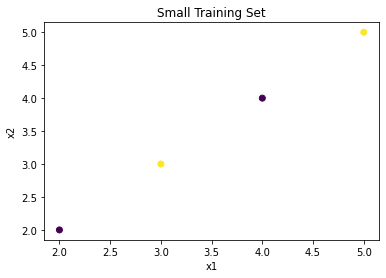

In [2]:
# Question 2 - 2
x_1 = [2.0, 3.0, 4.0, 5.0]
x_2 = [2.0, 3.0, 4.0, 5.0]
y = [0, 1, 0, 1]

plt.scatter(x_1, x_2, c=y, cmap='viridis')
plt.title('Small Training Set')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [3]:
# functions for Question 2 - 3

In [4]:
def entropy(data):
    new_data, count = np.unique(data, return_counts=True)
    prob = count / len(data)
    return -np.sum(prob * np.log2(prob)) # entropy calculation

In [5]:
def info_gain(data, candidate, t):
    left = data[data[candidate] >= t]
    right = data[data[candidate < t]]
    e_parent = entropy(data['y'])
    e_left = entropy(left['y'])
    e_right = entropy(right['y'])
    w_left = len(left)/len(data)
    w_right = len(right)/len(data)
    
    info_gain = e_parent - (w_left * e_left + w_right * e_right)
    info_gain_ratio = info_gain / (-np.sum([w_left * np.log2(w_left), w_right * np.log2(w_right)]))
    
    return info_gain, info_gain_ratio

In [6]:
def info_gain_ratio_calculation(data):
    x1_ = data
    info_gain_ratios_ = []
    for x in x1_:
        if len(data >= x) > 1:
            info_gain_ratio, info_gain_ = info_gain(data, 'x1', x)
            info_gain_ratios_.append((x, info_gain_ratio, info_gain_))
        else:
            info_gain_ratios_.append((x, info_gain_, info_gain_))
    return info_gain_ratios

In [7]:
# # Question 2 - 3
# data = pd.read_csv('data/Druns.txt', sep=' ', names=['x1', 'x2', 'y'])

# # results
# info_gain_ratios_x1 = info_gain_ratio_calculation(data['x1'])
# info_gain_ratios_x1 = pd.DataFrame(info_gain_ratios_x1, columns=['threshold_x1', 'info_gain_ratio', 'info_gain'])
# info_gain_ratios_x2 = info_gain_ratio_calculation(data['x2'])
# info_gain_ratios_x2 = pd.DataFrame(info_gain_ratios_x2, columns=['threshold_x1', 'info_gain_ratio', 'info_gain'])

In [8]:
# Question 2 - 4
data = pd.read_csv('data/D3leaves.txt', sep=' ', names=['x1', 'x2', 'y'])
data

,x1,x2,y
0,10,1,1
1,10,2,1
2,10,3,1
3,1,1,0
4,1,3,1


### We would build a decision tree using a self-defined node class since we cannot use scikit learn. However, we can use a manual tree classifier - a simple tree based on Occam's razor would have two levels - this tree would be classified based on the input features - if x1 is 10 then the label would be 1 else we consider both x1 and x2. If x1 is 1 and x2 is 1 the label is 0, and if x1 is 1 and x2 is 3 then the label is 1 again (leaf node again).

### Manually converting this to logic rules:
### if x1 == 10: class is 1
### if x1 == 1 and x2 == 1: class is 0
### if x1 == 1 and x2 == 3: class is 1

In [9]:
import pandas as pd
import numpy as np

# Load the data from Dbig.txt
data = pd.read_csv('data/Dbig.txt', sep=' ', names=['x1', 'x2', 'y'])

# Generate a random permutation of indices
np.random.seed(42)  # for reproducibility
indices = np.random.permutation(len(data))

# Split at 8192 to create the training set and test set
split_index = 8192
training_indices = indices[:split_index]
test_indices = indices[split_index:]

# Split the data
training_data = data.iloc[training_indices]
test_data = data.iloc[test_indices]

# Prepare the training and test sets
X_train = training_data[['x1', 'x2']]
y_train = training_data['y']
X_test = test_data[['x1', 'x2']]
y_test = test_data['y']

# Build the decision tree manually (you can use your own tree building algorithm)

# Here's a simple example of a decision tree based on x1 value
def simple_decision_tree(x1_value):
    if x1_value <= 5.0:
        return 0
    else:
        return 1

# Predict using the trained model
y_pred = X_test['x1'].apply(simple_decision_tree)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)


Accuracy: 0.39103982300884954


In [10]:
# Question 2 - 7
data = pd.read_csv('data/Dbig.txt', sep=' ', names=['x1', 'x2', 'y'])

# random indices permutation
np.random.seed(68)
cuts = np.random.permutation(len(data))

split_index = 8192
training_cuts = cuts[:split_index]
test_cuts = cuts[split_index]

train_data = data.iloc[training_cuts]
test_data = data.iloc[test_cuts]

X_train = train_data[['x1', 'x2']]
y_train = train_data['y']
X_test = test_data[['x1', 'x2']]
y_test = test_data['y']

In [11]:
values = [32, 128, 512, 2048, 8192]
train_sets = [train_data[:n] for n in values]

In [12]:
# Question 3
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# train_sets has the training data we need divided accordingly

/Users/nikhil/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
# c_nodes_list = []
# test_errs = []

# for training_inds, n in zip(train_sets, values):
#     train_data_ = data.loc[training_inds]
#     X_train_n = train_data_[['x1', 'x2']]
#     y_train_n = train_data['y']
    
#     clf_n = DecisionTreeClassifier(random_state=68) # training decision tree
#     clf_n.fit(X_train_n, y_train_n)
    
#     c_nodes = clf_n.tree_.node_count # nodes calculation
#     c_nodes_list.append(c_nodes)
#     X_test_n = X_test[:n]
#     y_test_n = y_test[:n]
    
#     y_prediction_n = clf_n.predict(X_test_n)
#     test_err_n = 1 - accuracy_score(y_test_n, y_pred_n)
#     test_errs.append(test_err_n)
    
#     print(f"n = {n}")
#     print(f"nodes count = {c_nodes}")
#     print(f"test error = {test_err_n}")
#     print()

In [14]:
from scipy.interpolate import lagrange

def make_train_set(a, b, n, noise=0):
    x_train = np.linspace(a,b,n)
    y_train = np.sin(x_train) + np.random.normal(0, noise, n)
    return x_train, y_train

def make_test_set(a, b, n):
    x_test = np.linspace(a, b, n)
    y_test = np.sin(x_test)
    return x_test, y_test

def lag_inter(x_train, y_train, x):
    poly = lagrange(x_train, y_train)
    return poly(x)

def mse(true_y, pred_y):
    return np.mean((true_y - pred_y)**2)

Train Error: 6.190851417722848e+138, Test Error: 6.190851417722848e+138


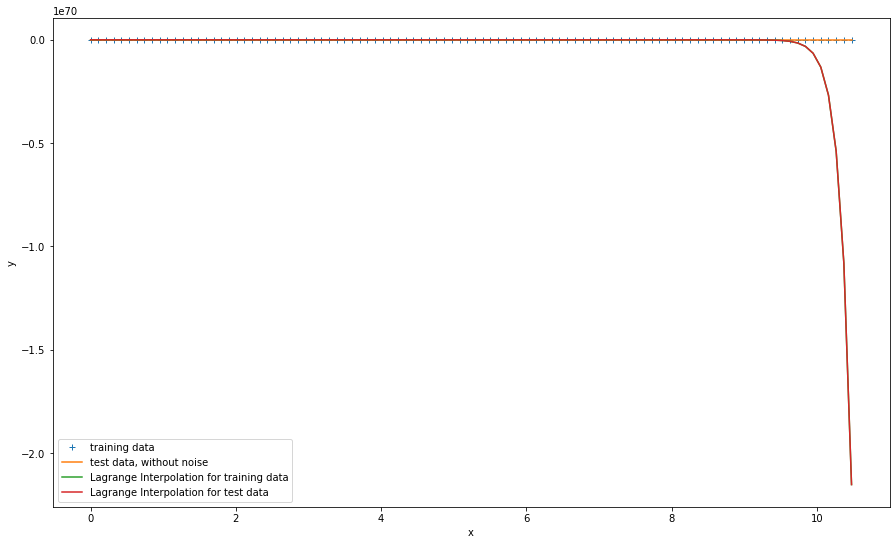

In [15]:
# Question 4

a, b = 0,2 * 5.2382038028302808
n = 100

x_train, y_train = make_train_set(a, b, n)
x_test, y_test = make_test_set(a, b, n)
pred_y_train = lag_inter(x_train, y_train, x_train)
pred_y_test = lag_inter(x_train, y_train, x_test)

train_err = mse(y_train, pred_y_train)
test_err = mse(y_test, pred_y_test)

print(f"Train Error: {train_err}, Test Error: {test_err}")

plt.figure(figsize=(15, 9))
plt.plot(x_train, y_train, '+', label="training data")
plt.plot(x_test, y_test, label="test data, without noise")
plt.plot(x_train, pred_y_train, label="Lagrange Interpolation for training data")
plt.plot(x_test, pred_y_test, label="Lagrange Interpolation for test data")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()